In [3]:
%matplotlib inline
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
fs, data = read('sine-440.wav')
Audio(data, rate=fs)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6606f4ca20>,
 [<matplotlib.lines.Line2D at 0x7f660b6fd6a0>])

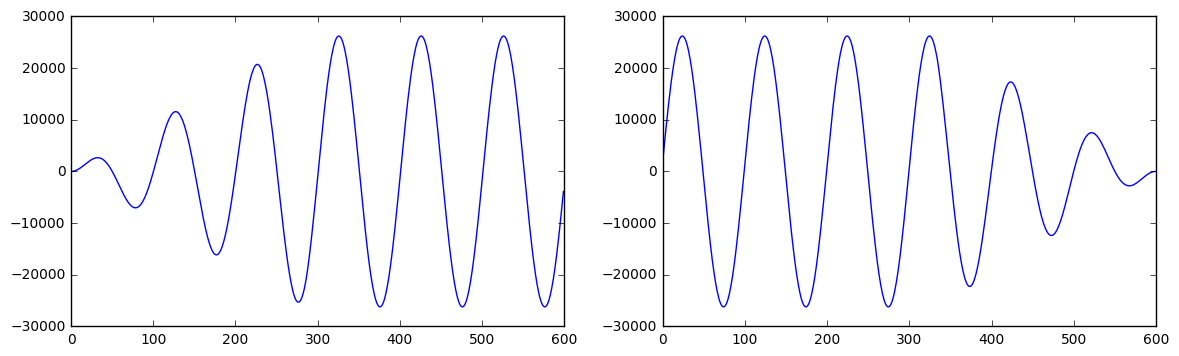

In [4]:
plt.figure(figsize=[14, 4])
plt.subplot(121), plt.plot(data[0:600])
plt.subplot(122), plt.plot(data[-600:])

In [5]:
import numpy as np
import soundfile as sf
N = 2048
rms = [np.sqrt(np.mean(block**2)) for block in 
       sf.blocks('sine-440.wav', blocksize=N, overlap=int(N/2))]
print(rms)

[0.53955713954096696, 0.56512786081481203, 0.56591146694886796, 0.56582927177364706, 0.56519601043870416, 0.56643538336605648, 0.56480199294858369, 0.56654834541351151, 0.56498894306548519, 0.56609414509622347, 0.56563396529305898, 0.56537077318176354, 0.56631190028578882, 0.56485350369578702, 0.5665776900320868, 0.56488350352972683, 0.56625724274509781, 0.56544087761242656, 0.5655604392341842, 0.56615833493210321, 0.56494504214819441, 0.56656439399149183, 0.56481656119164181, 0.5663928921120166, 0.56525952875229812, 0.56575606594739036, 0.56598208053170496, 0.56507215088266627, 0.56650900410015426, 0.56479109662251814, 0.56649444116435943, 0.56509853250252262, 0.56594815643825591, 0.56579139033081671, 0.56522843281581481, 0.56641401122506352, 0.56480865794487722, 0.56655735323297507, 0.56496574569508007, 0.56612780427868736, 0.56559578621292972, 0.5491342740028512, 0.51996072210940336]


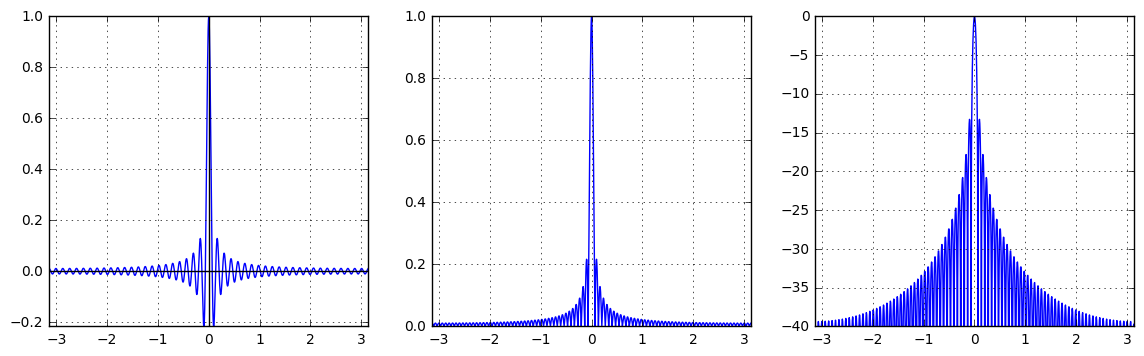

In [5]:
from ipywidgets import interact
from scipy.fftpack import fft, fftshift
import warnings
warnings.simplefilter("ignore")
def asinc(M=3):
    N = 1024
    w = np.linspace(-np.pi, np.pi, N, endpoint=False)
    x = np.sin(M*w/2)/(M*np.sin(w/2))
    x[np.isnan(x)] = 1
    mX = np.abs(x)
    plt.subplots(1, 3, figsize=(14, 4))
    plt.subplot(131)
    plt.plot(w, x)
    plt.axis('tight')
    ax = plt.gca()
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    plt.grid(True)
    plt.subplot(132)
    plt.plot(w, mX)
    plt.axis([-np.pi, np.pi, 0, 1])
    plt.grid(True)
    plt.subplot(133)
    plt.plot(w, 20*np.log10(mX))
    plt.axis([-np.pi, np.pi, -40, 0])
    plt.grid(True)
interact(asinc, M=(3,100,1))

In [6]:
def nextpow2(x):
    return int(np.ceil(np.log2(x)))